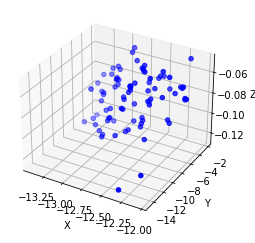

In [4]:
import numpy as np
import cv2

# Load the two input images
image1 = cv2.imread('image1.jpg')
image2 = cv2.imread('image2.jpg')

# Camera calibration matrix (intrinsic parameters)
K = np.array([[1000, 0, image1.shape[1] / 2],
              [0, 1000, image1.shape[0] / 2],
              [0, 0, 1]])

# Feature detection and matching
orb = cv2.ORB_create()
keypoints1, descriptors1 = orb.detectAndCompute(image1, None)
keypoints2, descriptors2 = orb.detectAndCompute(image2, None)

# Feature matching
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)
matches = sorted(matches, key=lambda x: x.distance)

# Extract matched keypoints
matched_keypoints1 = np.float32([keypoints1[match.queryIdx].pt for match in matches])
matched_keypoints2 = np.float32([keypoints2[match.trainIdx].pt for match in matches])

# Find essential matrix
E, _ = cv2.findEssentialMat(matched_keypoints1, matched_keypoints2, K)

# Recover pose
_, R, t, _ = cv2.recoverPose(E, matched_keypoints1, matched_keypoints2, K)

# Triangulate points to get 3D structure
P1 = np.hstack((np.eye(3), np.zeros((3, 1))))
P2 = np.hstack((R, t))
points4D = cv2.triangulatePoints(P1, P2, matched_keypoints1.T, matched_keypoints2.T)

# Convert to homogeneous coordinates and normalize
points3D = (points4D / points4D[3, :])[:3, :]

# Visualization (for simplicity, you can use matplotlib)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points3D[0], points3D[1], points3D[2], c='b', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


In [1]:
import gensim
from gensim import corpora
from gensim.models import LdaModel
from pprint import pprint

# Sample collection of documents
documents = [
    "Machine learning is a subfield of artificial intelligence.",
    "Natural language processing is an important topic in AI.",
    "Deep learning is a type of machine learning technique.",
    "Topic modeling is a useful tool for uncovering hidden themes in text data.",
    "Document clustering is an application of topic modeling.",
]

# Tokenize the documents
tokenized_docs = [document.split() for document in documents]

# Create a dictionary and corpus
dictionary = corpora.Dictionary(tokenized_docs)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

# Build the LDA model
lda_model = LdaModel(corpus, num_topics=2, id2word=dictionary, passes=15)

# Print the topics and associated words
print("Topics and their top words:")
pprint(lda_model.print_topics())

# For a new document, get the topic distribution
new_document = "I want to learn more about machine learning and deep learning."
new_doc_bow = dictionary.doc2bow(new_document.split())
topics = lda_model.get_document_topics(new_doc_bow)

print("\nTopics for the new document:")
pprint(topics)


Topics and their top words:
[(0,
  '0.065*"is" + 0.040*"in" + 0.040*"a" + 0.039*"for" + 0.039*"Topic" + '
  '0.039*"data." + 0.039*"hidden" + 0.039*"uncovering" + 0.039*"topic" + '
  '0.039*"themes"'),
 (1,
  '0.082*"is" + 0.081*"learning" + 0.059*"of" + 0.058*"a" + 0.035*"an" + '
  '0.035*"topic" + 0.035*"Deep" + 0.035*"technique." + 0.035*"machine" + '
  '0.035*"type"')]

Topics for the new document:
[(0, 0.17193095), (1, 0.8280691)]
